In [8]:
# Task number 01

!pip install gapminder 
import gapminder

        Entity      Code  Year  Life expectancy  GDP per capita  \
0     Abkhazia  OWID_ABK  2015              NaN             NaN   
1  Afghanistan       AFG  1950           27.638          1156.0   
2  Afghanistan       AFG  1951           27.878          1170.0   
3  Afghanistan       AFG  1952           28.361          1189.0   
4  Afghanistan       AFG  1953           28.852          1240.0   

  417485-annotations  Population (historical estimates) Continent  
0                NaN                                NaN      Asia  
1                NaN                          7752117.0       NaN  
2                NaN                          7840151.0       NaN  
3                NaN                          7935996.0       NaN  
4                NaN                          8039684.0       NaN  
[[ 22395.19512195]
 [156029.        ]
 [ 47661.62068966]
 [  5998.824646  ]]
[3 3 3 3 0 3 2 2 0 2 3 3 0 2 3 3 3 0 0 0 3 3 3 3 2 3 3 3 0 3 3 3 3 3 3 0 3
 0 0 3 2 3 3 3 3 3 3 2 0 3 3 2 2 0 3 

Text(0.5, 1.0, 'Predicted')

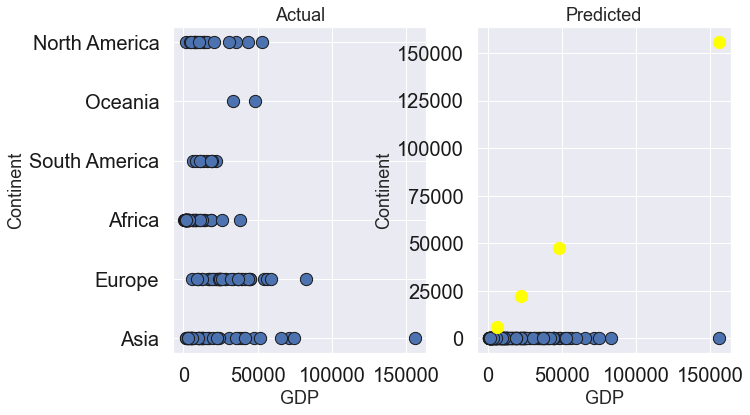

In [44]:
# Task number 02a
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline

# Kmeans without elbow
df = pd.read_csv("life-expectancy-vs-gdp-per-capita.csv")
print(df.head())
df.drop(['417485-annotations'], axis=1, inplace=True)
df.dropna(inplace=True)
X = df[['GDP per capita']]
Y = df['Continent']
km = KMeans(n_clusters = 4,  random_state=21)
km.fit(X)
centers = km.cluster_centers_
print(centers)

new_labels = km.labels_
print((new_labels))
fig, axes = plt.subplots(1, 2, figsize=(10,6))
axes[0].scatter(X, Y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(X, new_labels, cmap='jet',edgecolor='k', s=150)
axes[1].scatter(km.cluster_centers_, km.cluster_centers_, s=150, c='yellow', label='Centroids')
axes[0].set_xlabel('GDP', fontsize=18)
axes[0].set_ylabel('Continent', fontsize=18)
axes[1].set_xlabel('GDP', fontsize=18)
axes[1].set_ylabel('Continent', fontsize=18)
axes[0].tick_params(direction='out', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='out', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

C:\Users\Saman Khan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


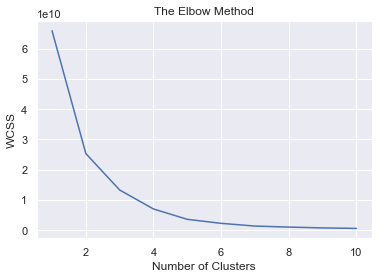

[1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1
 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1]


In [39]:
# Kmeans with elbow
wcss=[]
for i in range(1 , 11):
    km=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

kms=KMeans(n_clusters = 3, init='k-means++', max_iter=300,  random_state=0)
ykmeans=kms.fit_predict(X)
print(ykmeans)

[[81.22012821]
 [54.92908333]
 [70.08609677]
 [75.44950943]
 [62.35266667]]
[4 3 3 4 3 3 0 0 2 3 2 0 3 0 4 2 3 2 3 3 4 4 2 1 0 2 1 1 0 3 3 4 4 0 1 3 0
 0 0 4 0 4 3 3 3 2 2 1 3 1 4 0 0 4 4 3 0 4 0 3 4 1 4 3 0 3 0 2 2 3 2 0 0 0
 3 0 3 2 4 3 2 2 3 0 1 4 2 3 0 4 4 3 1 0 4 3 3 2 2 3 3 1 4 4 2 0 0 3 4 1 2
 3 0 3 2 3 3 3 3 2 3 0 0 0 3 2 2 3 2 3 2 3 3 1 0 3 0 4 0 0 3 0 0 2 0 2 4 3
 4 3 3 3 2 4 2 3 0 0 3 2 2 3 4 4 4]


Text(0.5, 1.0, 'Predicted')

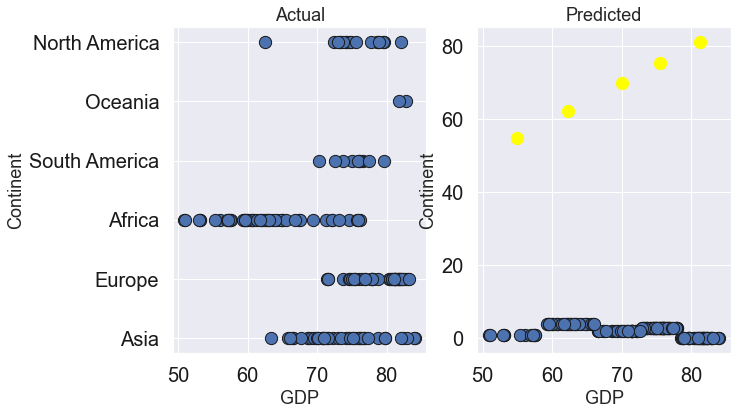

In [43]:
# Task number 02b
# Kmeans without elbow

X = df[['Life expectancy']]
Y = df['Continent']
km = KMeans(n_clusters = 5,  random_state=21)
km.fit(X)
centers = km.cluster_centers_
print(centers)

new_labels = km.labels_
print((new_labels))
fig, axes = plt.subplots(1, 2, figsize=(10,6))
axes[0].scatter(X, Y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(X, new_labels, cmap='jet',edgecolor='k', s=150)
axes[1].scatter(km.cluster_centers_, km.cluster_centers_, s=150, c='yellow', label='Centroids')
axes[0].set_xlabel('GDP', fontsize=18)
axes[0].set_ylabel('Continent', fontsize=18)
axes[1].set_xlabel('GDP', fontsize=18)
axes[1].set_ylabel('Continent', fontsize=18)
axes[0].tick_params(direction='out', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='out', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

C:\Users\Saman Khan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


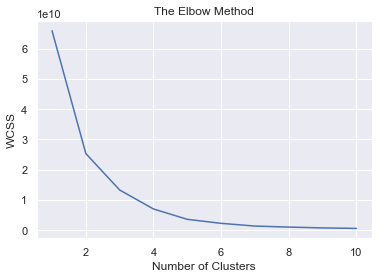

[1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1
 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1]


In [45]:
# Kmeans with elbow
wcss=[]
for i in range(1 , 11):
    km=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

kms=KMeans(n_clusters = 3, init='k-means++', max_iter=300,  random_state=0)
ykmeans=kms.fit_predict(X)
print(ykmeans)

Action space: Discrete(4)


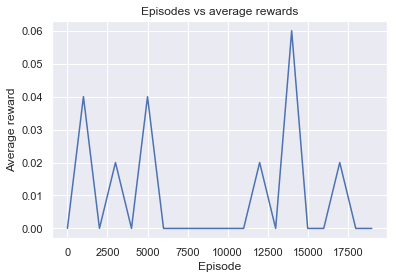

In [54]:
# Task number 03

import random
import gym

def select_action(state, eps):
    sample = np.random.uniform(0,1)
    if sample < eps:
        return env.action_space.sample()
    else:
        return state_action_vals[state].argmax()
    
    
env = gym.make('FrozenLake-v1')
print("Action space:", env.action_space)
# print("State space:", env.env.nS)
env.env.P
state_size = 16
action_space = env.action_space.n
alpha = 0.7
gamma = 1
state_action_vals = np.random.randn(state_size, action_space)
policy = np.zeros(state_size, dtype=int)
episodes = 20000
eps = 1
test_episodes = 50
test_every = 1000
test_episode = []
rewards = []
for ep in range(episodes):
    state = env.reset()
    action = select_action(state, eps)
    done = False
    while not done:
        next_state, reward, done, _ = env.step(action)
        next_action = select_action(state, eps)

        action_value = state_action_vals[state, action]
        next_action_value = state_action_vals[next_state, next_action]
        delta = reward + gamma * next_action_value - action_value
        state_action_vals[state, action] += alpha * delta
        state, action = next_state, next_action
        
    if ep % test_every == 0:
        total_rewards = 0
        for _ in range(test_episodes):
            done = False
            state = env.reset()
            while not done:
                action = state_action_vals[state].argmax()
                state, reward, done, _ = env.step(action)
                total_rewards += reward
        rewards.append(total_rewards / test_episodes)
        test_episode.append(ep)

fig, ax = plt.subplots()
ax.plot(test_episode, rewards)
ax.set_title('Episodes vs average rewards')
ax.set_xlabel('Episode')
_ = ax.set_ylabel('Average reward')

In [58]:
# Task number 04
from IPython.display import clear_output

def AVGTrip(qtable):
    lengths=[]
    for tripnum in range(1, 11):
        state = env.reset()
        done = False
        trip_length = 0        
        while not done and trip_length < 25:
            action = np.argmax(qtable[state])
            next_state, reward, done, info = env.step(action)
            clear_output(wait=True)
            state = next_state
            trip_length += 1
        lengths.append(trip_length)
        avg_len=sum(lengths)/10
        return avg_len
    
    
def QAlgo(learning_rate,discount_factor,exploration,total_eps,qtable):
    for taxi_run in range(total_eps):
        state = env.reset()
        done = False       
        while not done:
            random_value = random.uniform(0, 1)
            if (random_value < exploration):
                action = env.action_space.sample() 
            else:
                action = np.argmax(qtable[state]) 
                next_state, reward, done, info = env.step(action)
                prev_q = qtable[state, action]
                next_max_q = np.max(qtable[next_state])
                new_q = (1 - learning_rate) * prev_q + learning_rate * (reward + discount_factor * next_max_q)
                qtable[state, action] = new_q            
                state = next_state
                
                
env = gym.make("Taxi-v3")
env.reset()
env.render()
action_size = env.action_space.n
state_size = env.observation_space.n
qtable = np.zeros((state_size, action_size))
print(qtable)
initial_state = env.encode(2,3,2,0)
env.s = initial_state
env.render()
learning_rate = 0.1
discount_factor = 0.6
exploration = 0.1
total_eps = 10000
for i in range(total_eps):
    state = env.reset()
    done = False 
    while not done:
        random_value = random.uniform(0, 1)
        if (random_value < exploration):
            action = env.action_space.sample() 
        else:
            action = np.argmax(qtable[state]) 
            next_state, reward, done, info = env.step(action)  
            prev_q = qtable[state, action]
            next_max_q = np.max(qtable[next_state])
            new_q = (1 - learning_rate) * prev_q + learning_rate * (reward + discount_factor * next_max_q)
            qtable[state, action] = new_q        
            state = next_state
            
print(qtable)
learning_rate = 0.1
discount_factor = [0.5,0.6,0.7,0.8,0.9]
exploration = 0.1
distance=[0,0,0,0,0]

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

[[ 0.          0.          0.          0.          0.          0.        ]
 [-2.30890586 -2.30104427 -2.30591341 -2.30104427 -2.27325184 -2.8816    ]
 [-1.72385257 -1.70286013 -1.71482799 -1.70286013 -0.7504     -1.96      ]
 ...
 [-1.14478405 -1.10104459 -1.14478405 -1.17343637 -1.96       -1.96      ]
 [-1.99123398 -1.98393553 -1.99123398 -1.99758353 -2.8816     -2.8816    ]
 [-0.196      -0.196      -0.196      -0.07       -1.         -1.        ]]


In [59]:
for j in range(1,10):
    for i in range(len(discount_factor)):
        QAlgo(learning_rate,discount_factor[i],exploration,total_eps,qtable)
        distance[i]+=AVGTrip(qtable)

print(np.array(distance)/10)

[1.13 0.99 1.22 1.16 1.28]
